In [46]:
import pandas as pd

df=pd.read_csv("/Users/devalpatel/Downloads/house-prices-advanced-regression-techniques/train.csv", index_col=0)
df_test = pd.read_csv("/Users/devalpatel/Downloads/house-prices-advanced-regression-techniques/test.csv", index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

[]

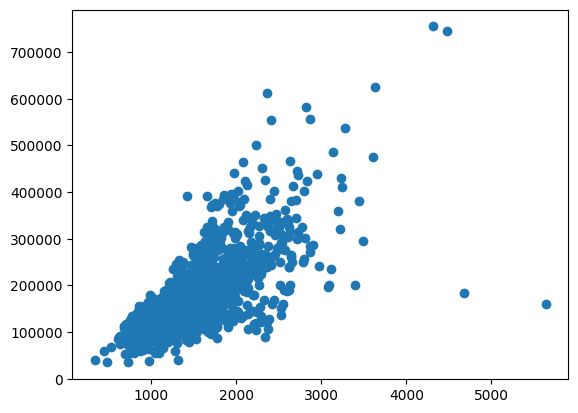

In [48]:
import matplotlib.pyplot as pyplt

ax = pyplt.subplot()

ax.scatter(x=df["GrLivArea"], y=df["SalePrice"])

ax.plot()

In [49]:
# Removing two outlier points

df.drop(df[(df["GrLivArea"]>4000) & (df["SalePrice"]<300000)].index, inplace=True)
df.shape

(1458, 80)

/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_2780/1369355349.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"], fit=norm)


[]

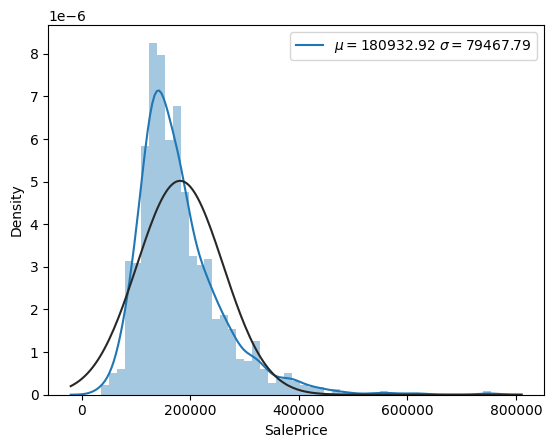

In [50]:
# Examining target variable distribution
import seaborn as sns
from scipy.stats import norm, skew

sns.distplot(df["SalePrice"], fit=norm)
mu, sigma = norm.fit(df["SalePrice"])
pyplt.legend(["$\mu = ${:.2f} $\sigma = ${:.2f}".format(mu, sigma)])
pyplt.plot()

In [51]:
df["SalePrice"].unique()

array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000,
       129900, 118000, 129500, 345000, 144000, 279500, 157000, 132000,
       149000,  90000, 159000, 139000, 325300, 139400, 230000, 154000,
       256300, 134800, 306000, 207500,  68500,  40000, 149350, 179900,
       165500, 277500, 309000, 145000, 153000, 109000,  82000, 160000,
       170000, 130250, 141000, 319900, 239686, 249700, 113000, 127000,
       177000, 114500, 110000, 385000, 130000, 180500, 172500, 196500,
       438780, 124900, 158000, 101000, 202500, 219500, 317000, 180000,
       226000,  80000, 225000, 244000, 185000, 144900, 107400,  91000,
       135750, 136500, 193500, 153500, 245000, 126500, 168500, 260000,
       174000, 164500,  85000, 123600, 109900,  98600, 163500, 133900,
       204750, 214000,  94750,  83000, 128950, 205000, 178000, 118964,
       198900, 169500, 100000, 115000, 190000, 136900, 383970, 217000,
       259500, 176000, 155000, 320000, 163990, 136000, 153900, 181000,
      

In [52]:
# from sklearn.preprocessing import PowerTransformer

# pt = PowerTransformer(method='box-cox')
# df["SalePrice"] = pt.fit_transform(pd.DataFrame(df["SalePrice"]))
# print(df["SalePrice"])
# print(f"{pt.lambdas_}")



In [53]:
df = df[df["SalePrice"].isna()==False]
df.shape

(1458, 80)

/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_2780/2869428669.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"])


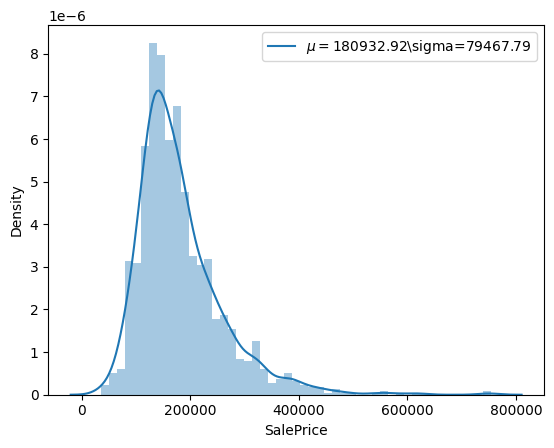

In [54]:
sns.distplot(df["SalePrice"])
mu, sigma = norm.fit(df["SalePrice"])

pyplt.legend(['$\mu = {:.2f} $\sigma={:.2f}'.format(mu, sigma)])
pyplt.show()

Y_train = df["SalePrice"]
df.drop(columns=["SalePrice"], inplace=True)

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression

In [56]:
df["Alley"].fillna( "None", inplace=True)
df["MasVnrType"].fillna( "None", inplace=True)
df["MasVnrArea"].fillna(0, inplace=True)

df_test["Alley"].fillna( "None", inplace=True)
df_test["MasVnrType"].fillna( "None", inplace=True)
df_test["MasVnrArea"].fillna(0, inplace=True)

/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_2780/161341136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Alley"].fillna( "None", inplace=True)
/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_2780/161341136.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [57]:
lst = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for col in lst:
    df[col].fillna("None", inplace=True)
    df_test[col].fillna("None", inplace=True)

df["Electrical"].fillna("SBrkr", inplace=True)
df_test["Electrical"].fillna("SBrkr", inplace=True)

/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_2780/3688269310.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("None", inplace=True)
/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_2780/3688269310.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [58]:
df['LotFrontage']=df.groupby("Neighborhood")['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_test['LotFrontage']=df_test.groupby("Neighborhood")['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [59]:
df.info()
print(df.shape)
print(df_test.shape)


<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1458 non-null   int64  
 1   MSZoning       1458 non-null   object 
 2   LotFrontage    1458 non-null   float64
 3   LotArea        1458 non-null   int64  
 4   Street         1458 non-null   object 
 5   Alley          1458 non-null   object 
 6   LotShape       1458 non-null   object 
 7   LandContour    1458 non-null   object 
 8   Utilities      1458 non-null   object 
 9   LotConfig      1458 non-null   object 
 10  LandSlope      1458 non-null   object 
 11  Neighborhood   1458 non-null   object 
 12  Condition1     1458 non-null   object 
 13  Condition2     1458 non-null   object 
 14  BldgType       1458 non-null   object 
 15  HouseStyle     1458 non-null   object 
 16  OverallQual    1458 non-null   int64  
 17  OverallCond    1458 non-null   int64  
 18  YearBuilt    

In [60]:
df_temp_train = df.copy()

df = pd.concat([df, df_test], axis=0)
print(df.shape)

for col in df.columns:
    if df[col].dtype == "object":
        df = pd.get_dummies(columns=[col], data=df, drop_first=True, dtype=int)
        

df_train = df.iloc[:len(Y_train),:]
df_test = df.iloc[len(Y_train):,:].copy()

df_train = df_train.copy()

df_temp = df.copy()
print(df_temp.shape)
print(df_test.shape)


(2917, 79)
(2917, 360)
(1459, 360)


In [61]:
# pd.DataFrame(Y_pred2).to_csv("3.csv")



In [62]:
# from library_functions_jupyter.libs import *

# residual_plots_y_vs_predictors(X_train, Y_train, use_column_ids=[13, 15, 17, 19, 8, 7, 5, 9, 4, 3, 2, 1, 26, 28, 27, 29, 31, 32])


In [63]:
# Following Columns doesn't seem to follow constant variance in residual assumption From above plots

# 13, 14, 15, 17, 19, 8, 7, 5, 9, 4, 3, 2, 1, 26, 28, 27, 29, 31, 32

# Applying Box-cox Transformation to each of them before training again


In [64]:
df_test.iloc[:,13]
df_test.iloc[:,13].shape

(1459,)

In [65]:
from sklearn.preprocessing import power_transform

# Box-Cox Transformation for all selected columns
for i in [29,31,32, 2]:
    df_t = pd.concat([df_train.iloc[:, i],df_test.iloc[:, i] ]).copy()
    df_train.iloc[:, i]= df_t[:len(Y_train)]
    df_test.iloc[:, i]= df_t[len(Y_train):]
    df_train.iloc[:,i].fillna(df_train.iloc[:,i].median(), inplace=True)
    df_test.iloc[:,i].fillna(df_test.iloc[:,i].median(), inplace=True)

for i in range(len(df_test.columns)):
    df_test.iloc[:,i].fillna(df_test.iloc[:,i].median(), inplace=True)


print(df_test.shape)

(1459, 360)


/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_2780/2211084451.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.iloc[:,i].fillna(df_train.iloc[:,i].median(), inplace=True)
/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_2780/2211084451.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

gb =GradientBoostingRegressor(n_estimators=400)
gb.fit(df_train, Y_train)

GradientBoostingRegressor(n_estimators=400)

In [67]:
y_pred = gb.predict(df_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_squared_error(Y_train, y_pred))
print(mean_absolute_error(Y_train, y_pred))


65642460.62103864
6256.254212230037


In [68]:
#df_test.head()
Y_pred = gb.predict(df_test)

In [69]:
pd.DataFrame(Y_pred).to_csv("3.csv")